In [1]:
import pandas as pd  #Importamos la biblioteca pandas
try:
    df_Alerta = pd.read_csv('ALERTA.csv', delimiter=';') #leer tu archivo
    print("DataFrame cargado exitosamente:")
    print(df_Alerta.head())  #muestra las primeras 5 filas del DataFrame
    print("\nInformación general del DataFrame:")
    df_Alerta.info() #proporciona un resumen conciso del DataFrame, incluyendo el tipo de datos de cada columna y el número de valores no nulos.
except FileNotFoundError: #Captura el caso específico en que el archivo no existe en la ruta dada y evita que el programa se caiga
    print("Error: El archivo 'ALERTA.csv' no fue encontrado. Asegúrate de que esté en la misma carpeta que tu script o proporciona la ruta completa.")
except Exception as e: #Captura cualquier otro error inesperado (por ejemplo, un problema de formato). Guardamos el mensaje en e para mostrarlo.
    print(f"Ocurrió un error al cargar el archivo CSV: {e}")
    print("Por favor, verifica el delimitador y la estructura del archivo.")

DataFrame cargado exitosamente:
   UDI Producto ID Nombre_Producto   Tipo  Temperatura_Aire  \
0    1      M14860   Producto 7004  Medio             298.1   
1    2      L47181   Producto 1004   Bajo             298.2   
2    3      L47182   Producto 1005   Bajo             298.1   
3    4      L47183   Producto 1006   Bajo             298.2   
4    5      L47184   Producto 1007   Bajo             298.2   

   Temperatura_Proceso  Velocidad_Rotacion  Torque  Desgaste_Herramientas  \
0                308.6                1551    42.8                      0   
1                308.7                1408    46.3                      3   
2                308.5                1498    49.4                      5   
3                308.6                1433    39.5                      7   
4                308.7                1408    40.0                      9   

   Objetivo Tipo_de_falla  
0         0    No Failure  
1         0    No Failure  
2         0    No Failure  
3         0   

In [2]:
if 'df_Alerta' in locals(): # Verificar si el DataFrame df existe
    print("\n--- Evaluación de Calidad de Datos ---")

    # Tipos de datos por columna
    print("\n1. Tipos de datos por columna:")
    print(df_Alerta.dtypes)

    # Resumen estadístico para columnas numéricas
    print("\n2. Resumen estadístico (columnas numéricas):")
    print(df_Alerta.describe())

    # Resumen estadístico para columnas categóricas (si las hay)
    if not df_Alerta.select_dtypes(include=['object', 'category']).empty:# filtra columnas cuyo tipo sea object o category
        print("\n3. Resumen estadístico (columnas categóricas):")
        print(df_Alerta.describe(include=['object', 'category']))
    else:
        print("\n3. No se encontraron columnas categóricas para el resumen.")


    # Conteo de valores ausentes por columna
    print("\n4. Conteo de valores ausentes por columna:")
    missing_values = df_Alerta.isnull().sum()
    print(missing_values[missing_values > 0]) # Mostrar solo columnas con valores ausentes

    # Porcentaje de valores ausentes por columna
    print("\n5. Porcentaje de valores ausentes por columna:")
    missing_percentage = (df_Alerta.isnull().sum() / len(df_Alerta)) * 100
    print(missing_percentage[missing_percentage > 0]) # Mostrar solo columnas con valores ausentes

    # Revisar filas duplicadas
    print("\n6. Número de filas duplicadas:")
    duplicate_rows = df_Alerta.duplicated().sum()
    print(duplicate_rows)

    # Revisar valores únicos por columna (útil para identificar columnas con varianza cero o cardinalidad)
    print("\n7. Valores únicos por columna (primeras 10 columnas para brevedad):")
    for col in df_Alerta.columns[:10]: # Ajusta el [:10] si quieres ver más o menos columnas
        print(f"Columna '{col}': {df_Alerta[col].nunique()} valores únicos")



--- Evaluación de Calidad de Datos ---

1. Tipos de datos por columna:
UDI                        int64
Producto ID               object
Nombre_Producto           object
Tipo                      object
Temperatura_Aire         float64
Temperatura_Proceso      float64
Velocidad_Rotacion         int64
Torque                   float64
Desgaste_Herramientas      int64
Objetivo                   int64
Tipo_de_falla             object
dtype: object

2. Resumen estadístico (columnas numéricas):
               UDI  Temperatura_Aire  Temperatura_Proceso  Velocidad_Rotacion  \
count  10000.00000      10000.000000         10000.000000        10000.000000   
mean    5000.50000        300.004930           310.005560         1538.776100   
std     2886.89568          2.000259             1.483734          179.284096   
min        1.00000        295.300000           305.700000         1168.000000   
25%     2500.75000        298.300000           308.800000         1423.000000   
50%     5000.50000 


--- Análisis Univariado ---

Análisis de la columna: Tipo
Conteo de categorías:
Tipo
Bajo     6000
Medio    2997
Alto     1003
Name: count, dtype: int64

Porcentaje de categorías:
Tipo
Bajo     60.00
Medio    29.97
Alto     10.03
Name: proportion, dtype: float64


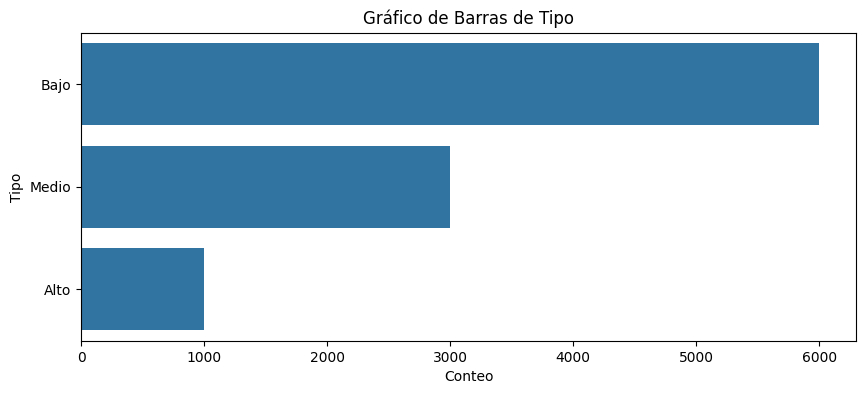


Análisis de la columna: Temperatura_Aire
Media: 300.00
Mediana: 300.10
Desviación Estándar: 2.00
Mínimo: 295.30
Máximo: 304.50


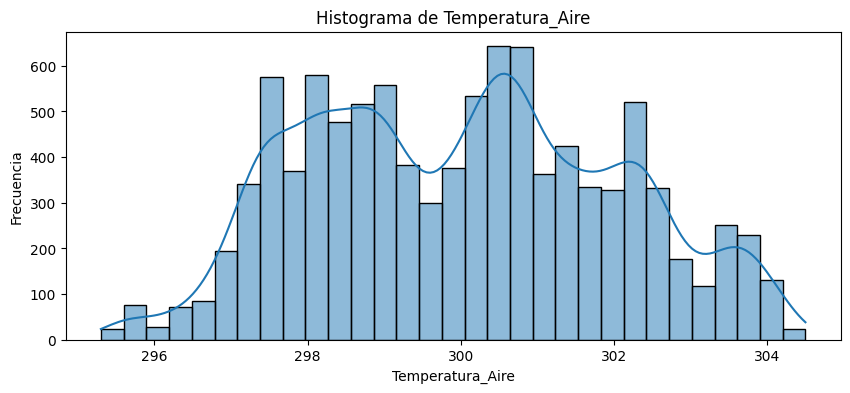

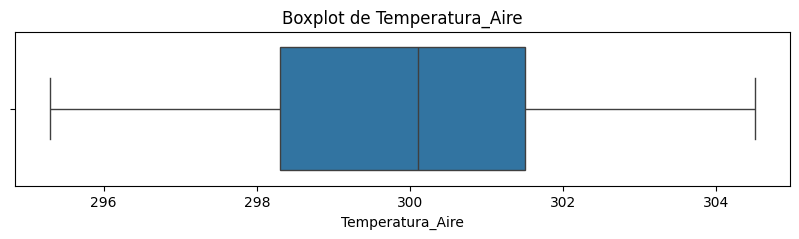


Análisis de la columna: Temperatura_Proceso
Media: 310.01
Mediana: 310.10
Desviación Estándar: 1.48
Mínimo: 305.70
Máximo: 313.80


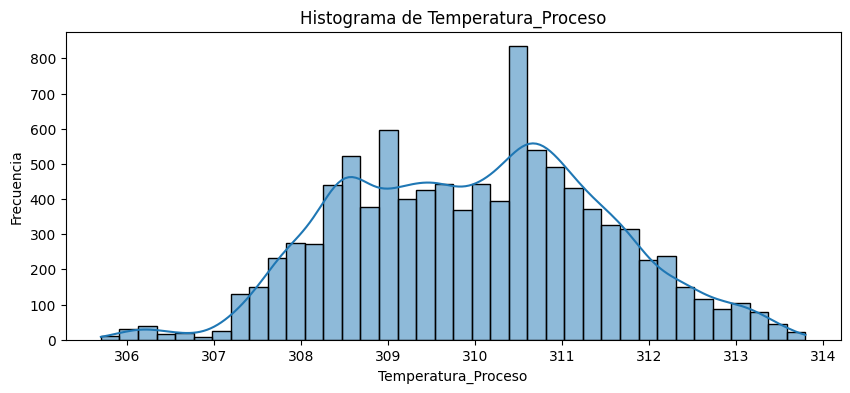

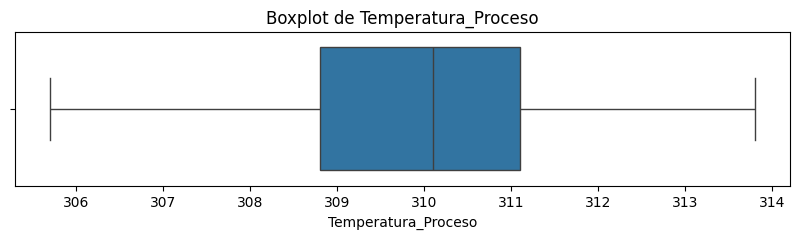


Análisis de la columna: Velocidad_Rotacion
Media: 1538.78
Mediana: 1503.00
Desviación Estándar: 179.28
Mínimo: 1168.00
Máximo: 2886.00


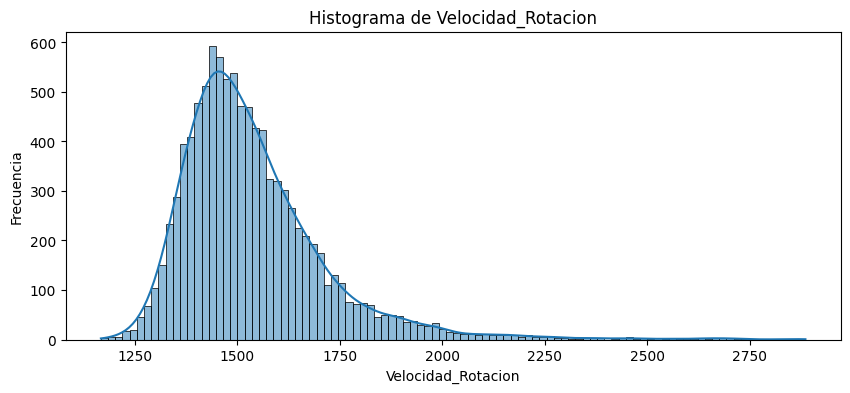

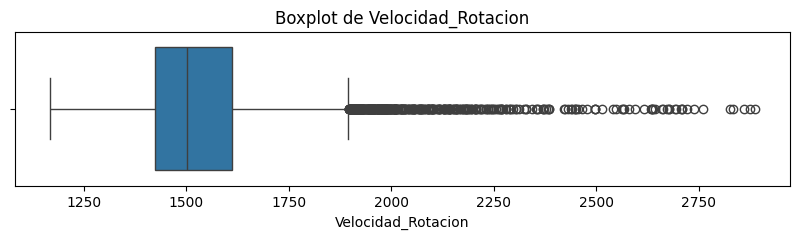


Análisis de la columna: Torque
Media: 39.99
Mediana: 40.10
Desviación Estándar: 9.97
Mínimo: 3.80
Máximo: 76.60


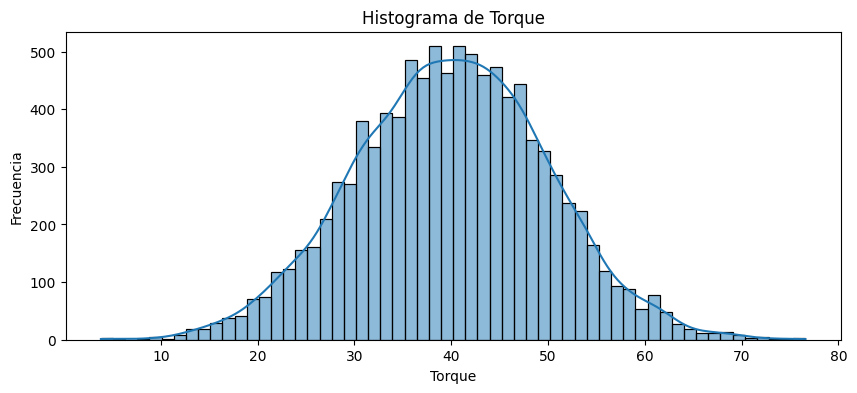

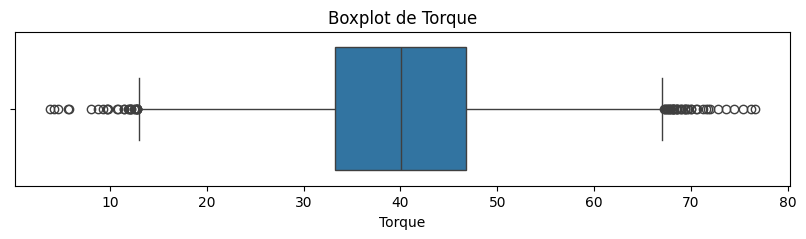


Análisis de la columna: Desgaste_Herramientas
Media: 107.95
Mediana: 108.00
Desviación Estándar: 63.65
Mínimo: 0.00
Máximo: 253.00


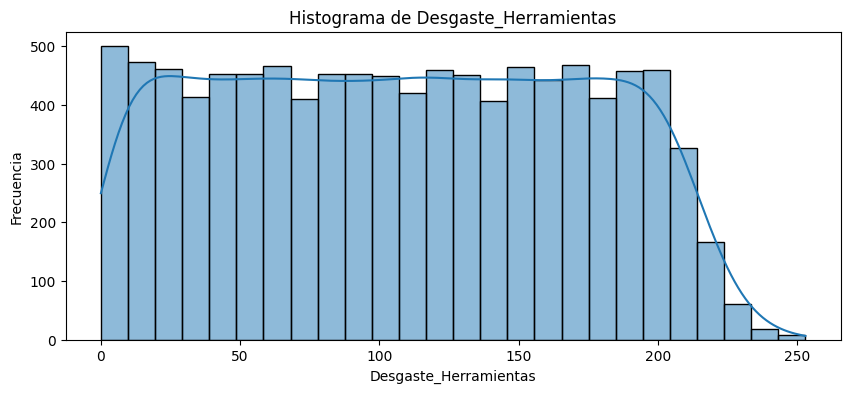

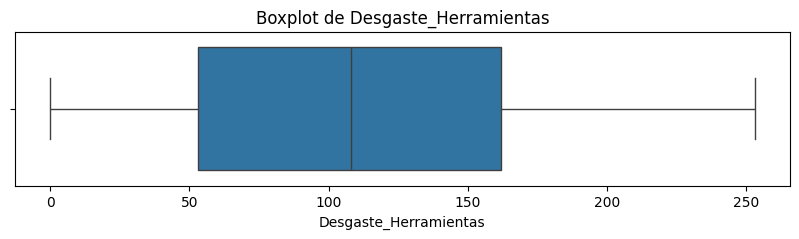


Análisis de la columna: Objetivo
Media: 0.03
Mediana: 0.00
Desviación Estándar: 0.18
Mínimo: 0.00
Máximo: 1.00


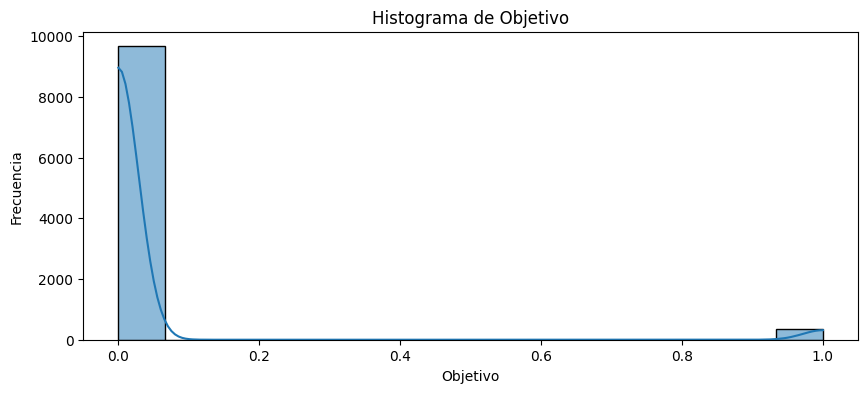

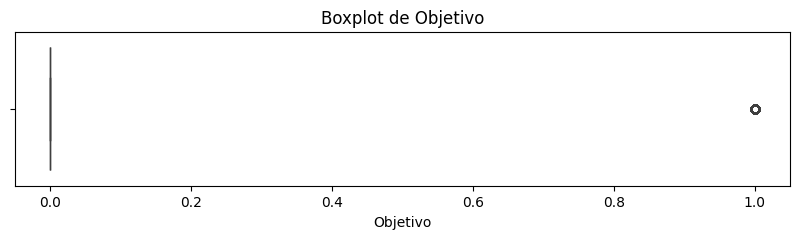


Análisis de la columna: Tipo_de_falla
Conteo de categorías:
Tipo_de_falla
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

Porcentaje de categorías:
Tipo_de_falla
No Failure                  96.52
Heat Dissipation Failure     1.12
Power Failure                0.95
Overstrain Failure           0.78
Tool Wear Failure            0.45
Random Failures              0.18
Name: proportion, dtype: float64


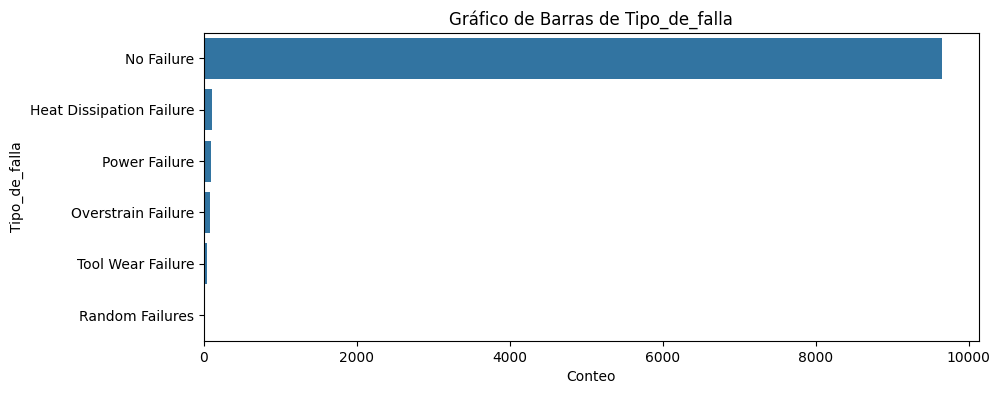

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_Alerta' in locals(): 
    print("\n--- Análisis Univariado ---")

    # Iterar sobre cada columna para el análisis
    for column in df_Alerta.columns[3:]:
        print(f"\nAnálisis de la columna: {column}")

        if pd.api.types.is_numeric_dtype(df_Alerta[column]):
            # Para variables numéricas
            print(f"Media: {df_Alerta[column].mean():.2f}")
            print(f"Mediana: {df_Alerta[column].median():.2f}")
            print(f"Desviación Estándar: {df_Alerta[column].std():.2f}")
            print(f"Mínimo: {df_Alerta[column].min():.2f}")
            print(f"Máximo: {df_Alerta[column].max():.2f}")

            # Histograma (usando el df_tratado para ver la distribución original si la normalización fue [0,1])
            plt.figure(figsize=(10, 4))
            sns.histplot(df_Alerta[column], kde=True) 
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.show()

            # Boxplot para identificar outliers (usando el df_Alerta)
            plt.figure(figsize=(10, 2))
            sns.boxplot(x=df_Alerta[column])
            plt.title(f'Boxplot de {column}')
            plt.xlabel(column)
            plt.show()

        elif pd.api.types.is_object_dtype(df_Alerta[column]) or pd.api.types.is_categorical_dtype(df_Alerta[column]):
            # Para variables categóricas
            print("Conteo de categorías:")
            print(df_Alerta[column].value_counts())
            print(f"\nPorcentaje de categorías:")
            print(df_Alerta[column].value_counts(normalize=True) * 100)

            # Gráfico de barras
            plt.figure(figsize=(10, 4))
            sns.countplot(y=df_Alerta[column], order = df_Alerta[column].value_counts().index)
            plt.title(f'Gráfico de Barras de {column}')
            plt.xlabel('Conteo')
            plt.ylabel(column)
            plt.show()
        else:
            print(f"La columna '{column}' tiene un tipo de dato no manejado explícitamente para el análisis univariado en este script.")